In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/phonesonamazon/amazon 1.xlsx


In [2]:
!pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.1/242.1 kB 1.1 MB/s eta 0:00:00


In [3]:
# importing important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import openpyxl
%matplotlib inline

In [4]:
df = pd.read_excel("/kaggle/input/phonesonamazon/amazon 1.xlsx")

In [5]:
df.shape

(365, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   phone_name              365 non-null    object 
 1   Unnamed: 1              0 non-null      float64
 2   Brand                   365 non-null    object 
 3   ratting_out_of_five     334 non-null    float64
 4   Rated_people            337 non-null    object 
 5   Offered_price_in_rupee  352 non-null    object 
 6   real_rice_in_rupee      342 non-null    float64
 7   Percent_off             342 non-null    float64
dtypes: float64(4), object(4)
memory usage: 22.9+ KB


In [7]:
df.describe()

,Unnamed: 1,ratting_out_of_five,real_rice_in_rupee,Percent_off
count,0.0,334.000000,342.000000,342.000000
mean,NaN,3.885928,18079.730994,22.315789
std,NaN,0.627220,13747.094069,9.850182
min,NaN,1.000000,1399.000000,6.000000
25%,NaN,3.700000,9999.000000,15.000000
50%,NaN,4.100000,14999.000000,21.000000
75%,NaN,4.200000,20990.000000,27.750000
max,NaN,5.000000,89999.000000,79.000000


In [8]:
df.drop(columns=["Unnamed: 1"],inplace=True)

In [9]:
df.dropna(inplace=True)

In [10]:
df.isnull().sum()

phone_name                0
Brand                     0
ratting_out_of_five       0
Rated_people              0
Offered_price_in_rupee    0
real_rice_in_rupee        0
Percent_off               0
dtype: int64

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274 entries, 0 to 364
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   phone_name              274 non-null    object 
 1   Brand                   274 non-null    object 
 2   ratting_out_of_five     274 non-null    float64
 3   Rated_people            274 non-null    object 
 4   Offered_price_in_rupee  274 non-null    object 
 5   real_rice_in_rupee      274 non-null    float64
 6   Percent_off             274 non-null    float64
dtypes: float64(3), object(4)
memory usage: 17.1+ KB


In [13]:
def d_t_changer(data):
    rdata =""
    for i in data:
        if i.isdigit() ==True:
            rdata += i
        else:
            pass
    return rdata
            

In [14]:
df["Rated_people"] =df["Rated_people"].apply(d_t_changer)
df["Offered_price_in_rupee"] =df["Offered_price_in_rupee"].apply(d_t_changer)

In [15]:

df["real_rice_in_rupee"] =df["real_rice_in_rupee"].astype("int")
df["Percent_off"] =df["Percent_off"].astype("int")
df["Rated_people"] =df["Rated_people"].astype("int")
df["Offered_price_in_rupee"] =df["Offered_price_in_rupee"].astype("int")

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274 entries, 0 to 364
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   phone_name              274 non-null    object 
 1   Brand                   274 non-null    object 
 2   ratting_out_of_five     274 non-null    float64
 3   Rated_people            274 non-null    int64  
 4   Offered_price_in_rupee  274 non-null    int64  
 5   real_rice_in_rupee      274 non-null    int64  
 6   Percent_off             274 non-null    int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 17.1+ KB


<AxesSubplot:xlabel='Offered_price_in_rupee', ylabel='Count'>

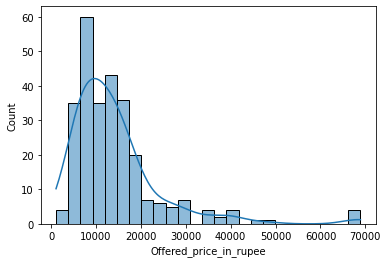

In [17]:
sns.histplot(df["Offered_price_in_rupee"],kde=True)

In [18]:
df["Offered_price_in_rupee"].skew()

2.665359984665317

In [19]:
df["Offered_price_in_rupee"].kurt()

9.759877357076284

In [20]:
# some conclusions till here
# most of the phone price lay between 50000 to 20000 rupees.
# data is positivily skewed mean its not noraml distibution
# for normal distibution kart() is -7 to 7 and skew is -2 to 2 and in this case skew=2.66 and kurt=9.5 hance 
# data is not lay in normal distibution

<AxesSubplot:>

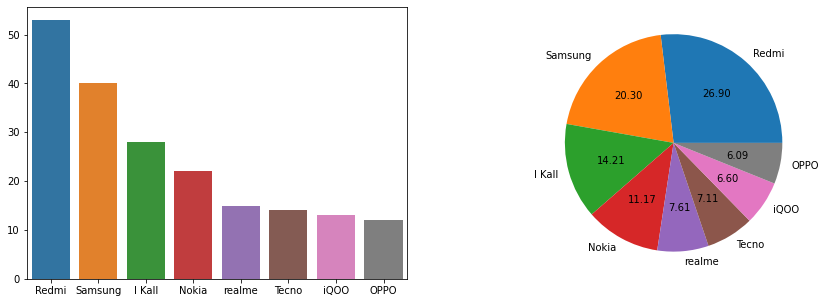

In [21]:
fig ,axes =plt.subplots(nrows=1,ncols=2 ,figsize=(15,5))
plt.pie(df["Brand"].value_counts().head(8).values,labels=df["Brand"].value_counts().head(8).index,autopct='%.2f')
sns.barplot(ax=axes[0],x=df["Brand"].value_counts().head(8).index,y=df["Brand"].value_counts().head(8).values)

In [22]:
# as you can see here in this data 47.2% market captured by two brands samsungs and redmi

In [23]:
df1=df.loc[df['Brand'].isin(df["Brand"].value_counts().head(8).index)]

In [24]:
# let's see what is the avrage prices  of the brands

In [25]:
x=df1.groupby("Brand")["Offered_price_in_rupee"].mean().sort_values(ascending =False).index
y=df1.groupby("Brand")["Offered_price_in_rupee"].mean().sort_values(ascending=False).values

In [26]:
# let's see which five brands phones are most expensive 

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Brand'>

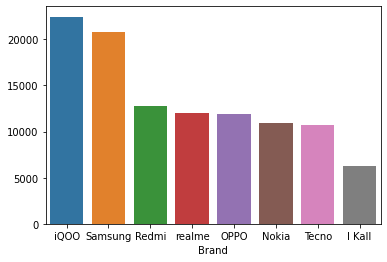

In [27]:
sns.barplot(x,y,data=df1)

In [28]:
# Here you can see iqoo avarage buying price higher then samsung and samsung buying price is higher then Redmi

In [29]:
x=df1["ratting_out_of_five"].value_counts().head(5).index
y=df1["ratting_out_of_five"].value_counts().head(5).values

<AxesSubplot:>

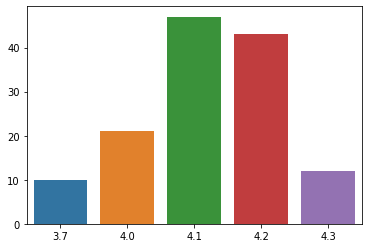

In [30]:
sns.barplot(y=y,x=x)

In [31]:
# let's see we will try to find-out which phones have more then 4 star rating and rated_people more then 5000

In [32]:
df3=df1[(df1["Rated_people"]>5000) & (df1["ratting_out_of_five"]>4)]

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


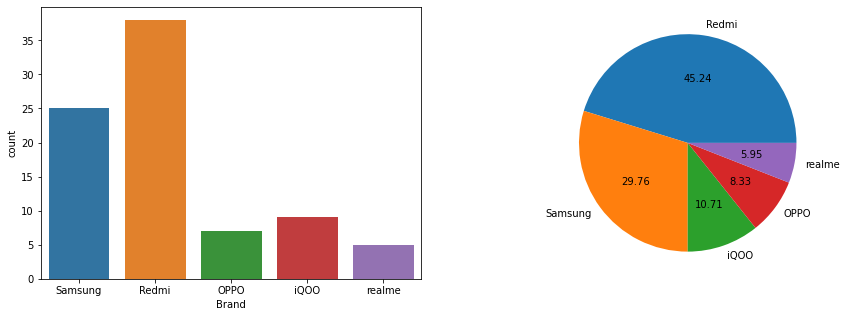

In [33]:
fig , axes =plt.subplots(nrows=1 ,ncols=2,figsize=(15,5))
sns.countplot(df3["Brand"],data=df3,ax=axes[0])
plt.pie(df3["Brand"].value_counts().values,labels=df3["Brand"].value_counts().index,autopct='%.2f')
plt.show()

In [34]:
# here you can see the brand have more then four star ratting and ratted by more then 50000 people
# by seeing this data you can say that redmi phones  are because peopeles are like best things
# you can see the share of the redmi is more then 45 % in this categaory# le
# on second number samsung

In [35]:
# let's see what type of corelarions is in this data on heatmap

<AxesSubplot:>

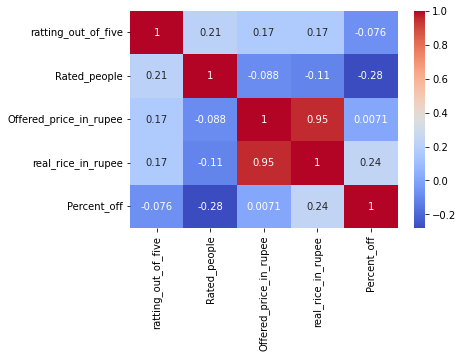

In [36]:
sns.heatmap(df1.corr(),cmap="coolwarm",annot=True)

In [37]:
# if number is near to 1 or -1 then the columns are highly corelated 
# if number is near to 1 its mean if one columns value is Increasing then second columns value also be Increase
# if number is near to -1 its mean if one columns value is Decreasing then second columns value also be Decrease

In [38]:
# I'm done
# in this notebook grammatical mistakes can be